In [90]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
import glob,pickle,os,copy,sys,random,time
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
#goal reach distance is 8, effective load is 1, obstacle collision distance is 0.75
def get_ground_truth(gd,gd_next):
    traj=[gd[0,:2]]
    for i in range(gd.shape[0]-1):
        if (gd_next[i,:]==gd[i+1,:]).all():
            traj.append(gd[i+1,:2])
        else:
            traj.append(gd_next[i,:2])
            traj.append(gd[i+1,:2])
    traj.append(gd_next[-1,:2])
    return np.array(traj)
def gen_init_state(mu,sigma,run_idx):
    np.random.seed(run_idx)
    if run_idx==0:
        init=mu
        init[-2:]=np.array([16,16])
        return init
    else:
        np.random.normal(mu,sigma,size=1)
        init=np.random.normal(mu,sigma,size=None)
        init[-2:]=np.array([16,16])
        return init
def in_hull(p,H1,H2):
    if H1.find_simplex(p)>=0 and H2.find_simplex(p)<0:
        return True
    else:
        return False

model_path='/Users/zsbjltwjj/Desktop/beliefspaceplanning/sim_nn_node/models/sim_cont_trajT_bs512_model512_BS64_loadT_ho40.pkl'
norm_path='/Users/zsbjltwjj/Desktop/beliefspaceplanning/sim_nn_node/models/normalization_arr_sim_cont_trajT_bs512_model512_BS64_loadT_ho40_py2'
data_path='/Users/zsbjltwjj/Desktop/robotic_hand_simulator/sim_data_cont_v0_d4_m1_episodes.obj'
goal_path='/Users/zsbjltwjj/Desktop/zs_sim_robot/set/goals.png'
set_path='/Users/zsbjltwjj/Desktop/zs_sim_robot/set/set_test/'
obs_set_path='/Users/zsbjltwjj/Desktop/zs_sim_robot/set/obs_set_test/'

if not os.path.exists(set_path):
    os.makedirs(set_path)
if not os.path.exists(obs_set_path):
    os.makedirs(obs_set_path)
with open(data_path, 'rb') as filehandler:
    memory = pickle.load(filehandler,encoding='latin')
with open(model_path, 'rb') as pickle_file:
    model = torch.load(pickle_file, map_location='cpu')
with open(norm_path, 'rb') as pickle_file:
    x_norm_arr, y_norm_arr = pickle.load(pickle_file)
    x_mean_arr, x_std_arr = x_norm_arr[0], x_norm_arr[1]
    y_mean_arr, y_std_arr = y_norm_arr[0], y_norm_arr[1]
init_st=np.empty((0,4))
st_all=np.empty((0,2))
for idx in range(len(memory)):
    state=memory[idx][:1,:4]
    state_all=memory[idx][:,:2]
    init_st=np.concatenate((init_st,state),axis=0)
    st_all=np.concatenate((st_all,state_all),axis=0)
mu=np.mean(init_st,axis=0)
sigma=np.std(init_st,axis=0)

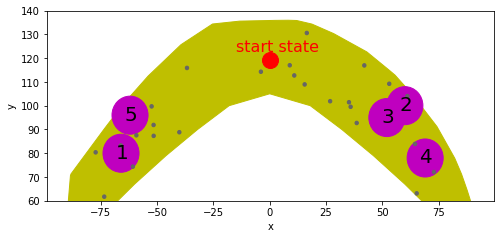

In [83]:
Goal = np.array([[-66, 80],
     [-41, 100], 
     [-62, 96], 
     [-49, 86], 
     [-55, 92],
     [59, 78],
     [31, 102],
     [60, 100],
     [52, 95],
     [-78, 67],
     [31, 125],
     [-26, 125],
     [0, 107],
     [3, 130],
     [-48, 114],
     [69, 78],
     ])
with open('/Users/zsbjltwjj/Desktop/beliefspaceplanning/rollout_node/set/obs_19.pkl', 'rb') as f: 
    Obs = pickle.load(f,encoding='latin')

fig, ax = plt.subplots(figsize=(8,3.5))
#hull = ConvexHull(st_all)
#H1 = []
#for simplex in hull.vertices:
#    H1.append(st_all[simplex, :])
H1=np.array([[ 88.67572021,  44.43453217],
       [ 89.80430603,  49.65908432],
       [ 90.23077393,  52.36616516],
       [ 90.37576294,  55.98774719],
       [ 89.2946167 ,  59.5026474 ],
       [ 87.69602966,  64.31713104],
       [ 85.16108704,  71.19532013],
       [ 82.13684845,  77.89694977],
       [ 74.24691772,  91.19889069],
       [ 68.09080505,  98.77561188],
       [ 61.46546173, 106.65620422],
       [ 55.63877487, 112.83303833],
       [ 53.02430725, 114.92677307],
       [ 43.14427567, 122.59031677],
       [ 43.12343216, 122.6015625 ],
       [ 28.351017  , 130.32281494],
       [ 18.74747467, 134.30844116],
       [ 11.96526051, 135.81428528],
       [  8.20428085, 135.91555786],
       [  2.36519504, 135.85865784],
       [-13.29637909, 135.5484314 ],
       [-25.39010048, 134.3369751 ],
       [-39.37775421, 125.64316559],
       [-53.93115997, 112.47859192],
       [-65.12301636, 100.51941681],
       [-73.16171265,  90.56554413],
       [-88.19309998,  71.29073334],
       [-88.44422913,  70.54364777],
       [-89.6594696 ,  56.80038452],
       [-89.75466156,  55.28162766],
       [-89.63751221,  50.12192154],
       [-89.49487305,  48.43606567],
       [-89.34468079,  46.8845253 ],
       [-89.0162735 ,  46.1090126 ],
       [-88.13287354,  44.4129982 ],
       [-87.78145599,  43.91517639]])
H2 = np.array([[-87,41],[-83,46],[-76,52],[-60,67],[-46,79],[-32,90],[-18,100],[0,105],[18,100],[32,90],[46,79],[60,67],[76,52],[83,46],[87,41]])
H1D=Delaunay(H1)
H2D=Delaunay(H2)
H = np.concatenate((np.array(H1)[:,:], H2), axis=0)
pgon = plt.Polygon(H, color='y', alpha=1, zorder=0)
ax.add_patch(pgon)

inx = [0, 7, 8, 15, 2]

j = 1
for i in inx:
    ctr = Goal[i]
    goal_plan = plt.Circle((ctr[0], ctr[1]), 8., color='m')
    ax.add_artist(goal_plan)
    plt.text(ctr[0]-2.5, ctr[1]-2, str(j), fontsize=20)
    j += 1
for os in Obs:
    if in_hull(np.array(os[:2]),H1D,H2D):
        obs = plt.Circle(os[:2], os[2], color=[0.4,0.4,0.4])#, zorder=10)
        ax.add_artist(obs)
    
plt.plot(0, 119, 'ok', markersize=16, color ='r')
plt.text(-15, 123, 'start state', fontsize=16, color ='r')
plt.ylim([60, 140])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(goal_path, dpi=200)

In [119]:
def normalize(data,x_std_arr,x_mean_arr):
    return (data - x_mean_arr[:data.shape[-1]]) / x_std_arr[:data.shape[-1]]
def denormalize(data,y_std_arr,y_mean_arr):
    return data * y_std_arr[:data.shape[-1]] + y_mean_arr[:data.shape[-1]]
def predict(state,ac,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr):
    sa=np.concatenate([state,ac])
    inpt = normalize(sa,x_std_arr,x_mean_arr)
    inpt = torch.tensor(inpt, dtype=torch.float)
    state_delta = model(inpt)    
    state_delta = state_delta.detach().numpy()
    state_delta = denormalize(state_delta,y_std_arr,y_mean_arr)
    next_state= sa[:4] + state_delta
    return next_state

class node(object):
    def __init__(self,state):
        self.state=state
        self.loc=state[:2]
        self.load=state[2:]
        self.prev=None
        self.g=0
        self.ng=0
        self.step=0
        self.action=np.array([0,0])
    def add_prev(self,prev_node,action):
        self.prev=prev_node
        self.g=calc_g(prev_node,self)
        self.ng=0
        self.step=calc_step(prev_node,self)
        self.action=action
    def calc_f(self,h):
        #self.f=self.g+h
        self.f=self.ng+h
        #self.f=self.step+h
def isvalid(child,H1D,H2D,Obs,obs_dist):
    if not in_hull(child.loc,H1D,H2D):
        return False
    elif not (child.load>=1).all: 
        return False
    else:
        if (np.linalg.norm(child.loc-Obs[:,:2],axis=1)>obs_dist).all():
            return True
        else:
            return False
def priority_sort(f_fringe):
    index=np.random.choice(np.argwhere(f_fringe==np.min(f_fringe)).reshape(-1),1)[0]
    #index=list(np.argwhere(f_fringe==np.min(f_fringe)))[-1][0]
    return index

def dist(start_loc,end_loc):
    return np.linalg.norm(end_loc-start_loc)
def calc_g(parent,child):
    return parent.g+dist(parent.loc,child.loc)
def calc_step(parent,child):
    return parent.step+1
def calc_h(child,goal_loc):
    return dist(child.loc,goal_loc)
    
def Astar_discrete_onestep_stomodel(initial_state,goal_loc,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr,H1D,H2D,Obs,obs_dist):
    actions=[np.array([-1,1]),np.array([1,-1]),np.array([1,1]),np.array([-1,-1]),np.array([0,1]),np.array([1,0]),np.array([0,-1]),np.array([-1,0])]
    
    initial=node(initial_state)
    fringe=[initial]
    initial.calc_f(dist(initial.loc,goal_loc))
    state_fringe=[initial.state]
    f_fringe=[initial.f]
    state_closed_set=[]
    
    max_size_fringe=1
    num_expanded_nodes=0
    tstart=time.time()
    while len(fringe)!=0:
        if time.time()-tstart>=100:
            break
        index=priority_sort(f_fringe)
        
        state_fringe.pop(index)
        cur=fringe.pop(index)
        #print(cur.action)
        #print(cur.f-cur.g)
        #print(cur.f-cur.ng)
        #print(cur.f-cur.step)
        f_fringe.pop(index)

        if state_closed_set==[] or not np.any(np.all(np.isin(np.array(state_closed_set),cur.state,True),axis=1)):
            if dist(cur.loc,goal_loc)<=8:
                cur_path=copy.copy(cur)
                path=[cur_path.state]
                action_path=[cur_path.action]
                while cur_path.prev != None:
                    path.insert(0,cur_path.prev.state)
                    action_path.insert(0,cur_path.prev.action)
                    cur_path=cur_path.prev
                action_path.pop(0)
                total_time=time.time()-tstart
                return "success", np.array(path), np.array(action_path),len(action_path), num_expanded_nodes, max_size_fringe, total_time
            else:#start expanding
                num_expanded_nodes+=1
                for i in actions:
                    child_state=predict(cur.state,i,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr)
                    child=node(child_state)
                    if isvalid(child,H1D,H2D,Obs,obs_dist):
                        if state_closed_set==[] or not np.any(np.all(np.isin(np.array(state_closed_set),child.state,True),axis=1)):
                            if state_fringe==[] or not np.any(np.all(np.isin(np.array(state_fringe),child.state,True),axis=1)):
                                fringe.append(child)
                                child.add_prev(cur,i)
                                child.calc_f(calc_h(child, goal_loc))
                                state_fringe.append(child.state)
                                f_fringe.append(child.f)
                if len(fringe)>max_size_fringe:
                    max_size_fringe=len(fringe)
            state_closed_set.append(cur.state)
    total_time=time.time()-tstart
    return "failure", None, None, None, num_expanded_nodes, max_size_fringe, total_time

def plot_planned_traj(set_path,initial_state,run_idx,goal_idx,plan_path,goal_loc,H1,H2,Obs,obs_dist):
    fig, ax = plt.subplots(figsize=(8,3.5))
    H = np.concatenate((np.array(H1)[:,:], H2), axis=0)
    pgon = plt.Polygon(H, color='y', alpha=1, zorder=0)
    ax.add_patch(pgon)
    goal_plan = plt.Circle((goal_loc[0], goal_loc[1]), 8., color='m')
    ax.add_artist(goal_plan)
    plt.text(goal_loc[0]-3.5, goal_loc[1]-2.5, str(goal_idx), fontsize=20)
    H1D=Delaunay(H1)
    H2D=Delaunay(H2)
    for os in Obs:
        if in_hull(np.array(os[:2]),H1D,H2D):
            if np.linalg.norm(goal_loc-os[:2])>8+obs_dist:
                obs = plt.Circle(os[:2], obs_dist, color=[0.4,0.4,0.4])#, zorder=10)
                ax.add_artist(obs)
    plt.plot(initial_state[0], initial_state[1], 'ok', markersize=16, color ='r')
    plt.text(-15, 123, 'start state', fontsize=16, color ='r')
    if plan_path is not None:
        plt.plot(plan_path[:,0],plan_path[:,1],'-k')
    plt.ylim([60, 140])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig(set_path+'goal_'+str(goal_idx)+'_run_'+str(run_idx)+'.png', dpi=200)


53


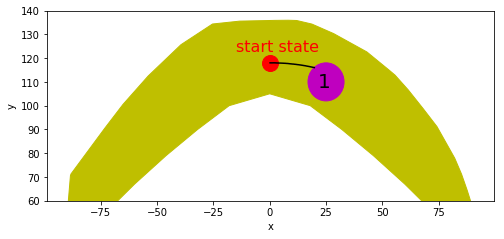

In [165]:
obs_dist=0
run_idx=0
goal_idx=1
initial_state=gen_init_state(mu,sigma,run_idx)
goal_loc=Goal[goal_idx]
goal_loc=np.array([25,110])
status, plan_path, plan_action_path,len_action_path, num_expanded_nodes, max_size_fringe, total_time\
=Astar_discrete_onestep_stomodel(initial_state,goal_loc,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr,H1D,H2D,Obs,obs_dist)
print(len_action_path)
np.savetxt(set_path+'plan_traj_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'.txt',\
           plan_path, fmt='%.20f', delimiter=',')
np.savetxt(set_path+'plan_action_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'.txt',\
           plan_action_path, fmt='%.20f', delimiter=',')
plot_planned_traj(set_path,initial_state,run_idx,goal_idx,plan_path,goal_loc,H1,H2,Obs,obs_dist)

437
149
154
342
159


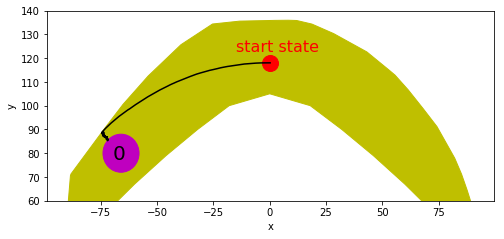

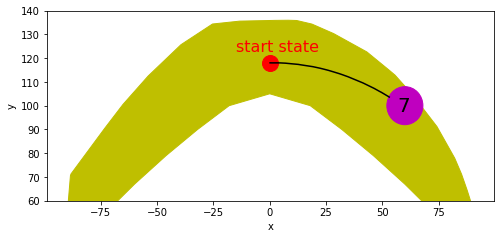

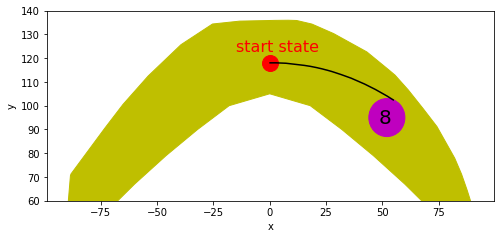

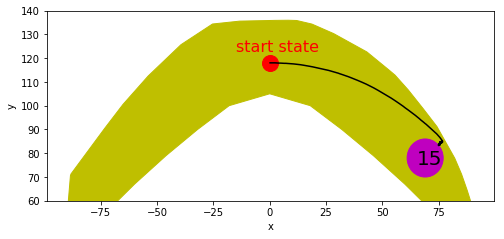

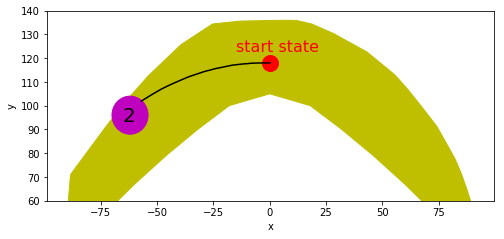

In [166]:
obs_dist=0
for goal_idx in [0,7,8,15,2]:
    run_idx=0
    initial_state=gen_init_state(mu,sigma,run_idx)
    goal_loc=Goal[goal_idx]
    #goal_loc=np.array([0,108])
    #acs=[np.array([-1,1]),np.array([1,-1]),np.array([1,1]),np.array([-1,-1]),np.array([0,1]),np.array([1,0]),np.array([0,-1]),np.array([-1,0])]
    status, plan_path, plan_action_path,len_action_path, num_expanded_nodes, max_size_fringe, total_time\
    =Astar_discrete_onestep_stomodel(initial_state,goal_loc,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr,H1D,H2D,Obs,obs_dist)
    print(len_action_path)
    np.savetxt(set_path+'plan_traj_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'.txt',\
               plan_path, fmt='%.20f', delimiter=',')
    np.savetxt(set_path+'plan_action_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'.txt',\
               plan_action_path, fmt='%.20f', delimiter=',')
    plot_planned_traj(set_path,initial_state,run_idx,goal_idx,plan_path,goal_loc,H1,H2,Obs,obs_dist)


683


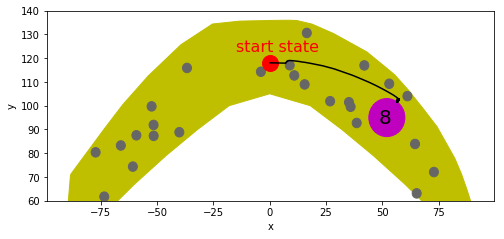

In [169]:
obs_dist=2
#for goal_idx in [0,7,8,15,2]:
for goal_idx in [8]:
    run_idx=0
    initial_state=gen_init_state(mu,sigma,run_idx)
    goal_loc=Goal[goal_idx]
    status, plan_path, plan_action_path,len_action_path, num_expanded_nodes, max_size_fringe, total_time\
    =Astar_discrete_onestep_stomodel(initial_state,goal_loc,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr,H1D,H2D,Obs,obs_dist)
    print(len_action_path)
    if len_action_path is not None:
        np.savetxt(obs_set_path+'plan_traj_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'.txt',\
                   plan_path, fmt='%.20f', delimiter=',')
        np.savetxt(obs_set_path+'plan_action_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'.txt',\
                   plan_action_path, fmt='%.20f', delimiter=',')
    plot_planned_traj(obs_set_path,initial_state,run_idx,goal_idx,plan_path,goal_loc,H1,H2,Obs,obs_dist)

45
17


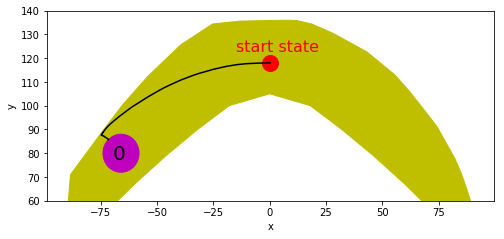

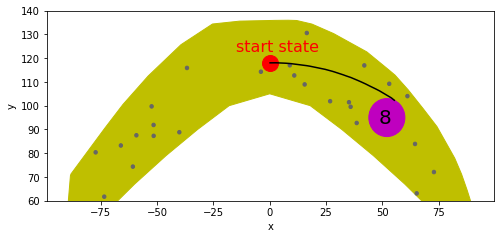

In [170]:
def mstep_predict(num_steps,state,ac,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr):
    next_state_arr=np.empty((0,4))
    for i in range(num_steps):
        sa=np.concatenate([state,ac])
        inpt = normalize(sa,x_std_arr,x_mean_arr)
        inpt = torch.tensor(inpt, dtype=torch.float)
        state_delta = model(inpt)    
        state_delta = state_delta.detach().numpy()
        state_delta = denormalize(state_delta,y_std_arr,y_mean_arr)
        next_state= sa[:4] + state_delta
        next_state_arr=np.concatenate((next_state_arr,next_state.reshape(1,4)),axis=0)
        state=next_state
    return next_state, next_state_arr

class mnode(object):
    def __init__(self,state,num_steps):
        self.state=state
        self.loc=state[:2]
        self.load=state[2:]
        self.prev=None
        self.g=0
        self.ng=0
        self.step=0
        self.action=np.repeat(np.array([0,0]).reshape(1,2),num_steps,axis=0)
        self.state_h=np.repeat(state.reshape(1,4),num_steps,axis=0)
    def add_prev(self,prev_node,action,state_h):
        self.prev=prev_node
        self.g=calc_g(prev_node,self)
        self.ng=0
        self.step=calc_step(prev_node,self)
        self.action=np.repeat(action.reshape(1,2),num_steps,axis=0)
        self.state_h=state_h
    def calc_f(self,h):
        #self.f=self.g+h
        self.f=self.ng+h
        #self.f=self.step+h
def mstep_isvalid(child,H1D,H2D,Obs,obs_dist):
    if not mstep_in_hull(child.state_h[:,:2],H1D,H2D):
        return False
    elif not (child.state_h[:,2:]>=1).all(): 
        return False
    else:
        for i in child.state_h[:,:2]:
            if not (np.linalg.norm(i-Obs[:,:2],axis=1)>obs_dist).all():
                return False
        return True
def mstep_in_hull(p,H1,H2):
    if (H1.find_simplex(p)>=0).all() and (H2.find_simplex(p)<0).all():
        return True
    else:
        return False
    
def Astar_discrete_mstep_stomodel(num_steps,initial_state,goal_loc,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr,H1D,H2D,Obs,obs_dist):
    actions=[np.array([-1,1]),np.array([1,-1]),np.array([1,1]),np.array([-1,-1]),np.array([0,1]),np.array([1,0]),np.array([0,-1]),np.array([-1,0])]
    
    initial=mnode(initial_state,num_steps)
    fringe=[initial]
    initial.calc_f(dist(initial.loc,goal_loc))
    state_fringe=[initial.state]
    f_fringe=[initial.f]
    state_closed_set=[]
    
    max_size_fringe=1
    num_expanded_nodes=0
    tstart=time.time()
    while len(fringe)!=0:
        if time.time()-tstart>=100:
            break
        index=priority_sort(f_fringe)
        
        state_fringe.pop(index)
        cur=fringe.pop(index)
        #print(cur.action)
        #print(cur.f-cur.g)
        #print(cur.f-cur.ng)
        #print(cur.f-cur.step)
        f_fringe.pop(index)

        if state_closed_set==[] or not np.any(np.all(np.isin(np.array(state_closed_set),cur.state,True),axis=1)):
            if (np.linalg.norm(goal_loc-cur.state_h[:,:2],axis=1)<=8).any():
                idx=np.argwhere((np.linalg.norm(goal_loc-cur.state_h[:,:2],axis=1)<=8)==True)[0][0]
                cur_path=copy.copy(cur)
                path=[cur_path.state_h[:idx+1,:]]
                action_path=[cur_path.action[:idx+1,:]]
                while cur_path.prev != None:
                    path.insert(0,cur_path.prev.state_h)
                    action_path.insert(0,cur_path.prev.action)
                    cur_path=cur_path.prev
                action_path.pop(0)
                path[0]=path[0][:1,:]
                total_time=time.time()-tstart
                return "success", np.concatenate(path,axis=0), np.concatenate(action_path,axis=0),len(action_path), num_expanded_nodes, max_size_fringe, total_time
            else:#start expanding
                num_expanded_nodes+=1
                for i in actions:
                    child_state,child_state_h=mstep_predict(num_steps,cur.state,i,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr)
                    child=mnode(child_state,num_steps)
                    if mstep_isvalid(child,H1D,H2D,Obs,obs_dist):
                        if state_closed_set==[] or not np.any(np.all(np.isin(np.array(state_closed_set),child.state,True),axis=1)):
                            if state_fringe==[] or not np.any(np.all(np.isin(np.array(state_fringe),child.state,True),axis=1)):
                                fringe.append(child)
                                child.add_prev(cur,i,child_state_h)
                                child.calc_f(calc_h(child, goal_loc))
                                state_fringe.append(child.state)
                                f_fringe.append(child.f)
                if len(fringe)>max_size_fringe:
                    max_size_fringe=len(fringe)
            state_closed_set.append(cur.state)
    total_time=time.time()-tstart
    return "failure", None, None, None, num_expanded_nodes, max_size_fringe, total_time

def mplot_planned_traj(num_steps,set_path,initial_state,run_idx,goal_idx,plan_path,goal_loc,H1,H2,Obs,obs_dist):
    fig, ax = plt.subplots(figsize=(8,3.5))
    H = np.concatenate((np.array(H1)[:,:], H2), axis=0)
    pgon = plt.Polygon(H, color='y', alpha=1, zorder=0)
    ax.add_patch(pgon)
    goal_plan = plt.Circle((goal_loc[0], goal_loc[1]), 8., color='m')
    ax.add_artist(goal_plan)
    plt.text(goal_loc[0]-3.5, goal_loc[1]-2.5, str(goal_idx), fontsize=20)
    H1D=Delaunay(H1)
    H2D=Delaunay(H2)
    for os in Obs:
        if in_hull(np.array(os[:2]),H1D,H2D):
            if np.linalg.norm(goal_loc-os[:2])>8+obs_dist:
                obs = plt.Circle(os[:2], obs_dist, color=[0.4,0.4,0.4])#, zorder=10)
                ax.add_artist(obs)
    plt.plot(initial_state[0], initial_state[1], 'ok', markersize=16, color ='r')
    plt.text(-15, 123, 'start state', fontsize=16, color ='r')
    if plan_path is not None:
        plt.plot(plan_path[:,0],plan_path[:,1],'-k')
    plt.ylim([60, 140])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig(set_path+'goal_'+str(goal_idx)+'_run_'+str(run_idx)+'_m_'+str(num_steps)+'.png', dpi=200)


obs_dist=0
num_steps=10
for goal_idx in [0]:
    run_idx=0
    initial_state=gen_init_state(mu,sigma,run_idx)
    goal_loc=Goal[goal_idx]
    #goal_loc=np.array([0,108])
    status, plan_path, plan_action_path,len_action_path, num_expanded_nodes, max_size_fringe, total_time\
    =Astar_discrete_mstep_stomodel(num_steps,initial_state,goal_loc,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr,H1D,H2D,Obs,obs_dist)
    print(len_action_path)
    np.savetxt(set_path+'plan_traj_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'_m_'+str(num_steps)+'.txt',\
               plan_path, fmt='%.20f', delimiter=',')
    np.savetxt(set_path+'plan_action_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'_m_'+str(num_steps)+'.txt',\
               plan_action_path, fmt='%.20f', delimiter=',')
    mplot_planned_traj(num_steps,set_path,initial_state,run_idx,goal_idx,plan_path,goal_loc,H1,H2,Obs,obs_dist)
    
obs_dist=0.75
num_steps=10
#for goal_idx in [0,7,8,15,2]:
for goal_idx in [8]:
    run_idx=0
    initial_state=gen_init_state(mu,sigma,run_idx)
    goal_loc=Goal[goal_idx]
    status, plan_path, plan_action_path,len_action_path, num_expanded_nodes, max_size_fringe, total_time\
    =Astar_discrete_mstep_stomodel(num_steps,initial_state,goal_loc,model,x_std_arr,x_mean_arr,y_std_arr,y_mean_arr,H1D,H2D,Obs,obs_dist)
    print(len_action_path)
    np.savetxt(obs_set_path+'plan_traj_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'_m_'+str(num_steps)+'.txt',\
               plan_path, fmt='%.20f', delimiter=',')
    np.savetxt(obs_set_path+'plan_action_goal_'+str(goal_idx)+'_run_'+str(run_idx)+'_m_'+str(num_steps)+'.txt',\
               plan_action_path, fmt='%.20f', delimiter=',')
    mplot_planned_traj(num_steps,obs_set_path,initial_state,run_idx,goal_idx,plan_path,goal_loc,H1,H2,Obs,obs_dist)